In [1]:
import numpy as np
import keras 
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [28]:
train_path = 'C:/Users/tahad/Desktop/Dataset/Train/'
valid_path = 'C:/Users/tahad/Desktop/Dataset/Validation/'
test_path = 'C:/Users/tahad/Desktop/Dataset/Test/'

In [29]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=['Healthy','Sick'], batch_size=50)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224),classes=['Healthy','Sick'], batch_size=70)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224),classes=['Healthy','Sick'], batch_size=16)

Found 100 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [30]:
imgs, labels = next(valid_batches)

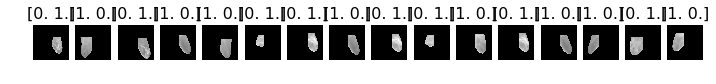

In [31]:
plots(imgs, titles=labels)

In [40]:
valid_batches.class_indices

{'Healthy': 0, 'Sick': 1}

In [7]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax')
])

In [8]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=7,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 7s - loss: 7.8544 - acc: 0.5029 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 7s - loss: 8.1512 - acc: 0.4943 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 7s - loss: 7.9669 - acc: 0.5057 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 8s - loss: 8.1512 - acc: 0.4943 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 8s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


Using VGG-16 model to improve accuracy

In [10]:
vgg16_model = keras.applications.vgg16.VGG16()

In [11]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
type(vgg16_model)

keras.engine.training.Model

In [13]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [15]:
for layer in model.layers:
    layer.trainable = False

In [16]:
model.add(Dense(2, activation = 'softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [18]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit_generator(train_batches, steps_per_epoch=8,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 146s - loss: 0.3234 - acc: 0.9000 - val_loss: 0.7632 - val_acc: 0.6250
Epoch 2/5
 - 152s - loss: 0.2892 - acc: 0.9150 - val_loss: 0.7947 - val_acc: 0.6250
Epoch 3/5
 - 152s - loss: 0.2616 - acc: 0.9275 - val_loss: 0.7803 - val_acc: 0.6250
Epoch 4/5
 - 157s - loss: 0.2381 - acc: 0.9325 - val_loss: 0.7789 - val_acc: 0.6250
Epoch 5/5
 - 152s - loss: 0.2180 - acc: 0.9400 - val_loss: 0.7879 - val_acc: 0.6250


Plotting confusion matrix

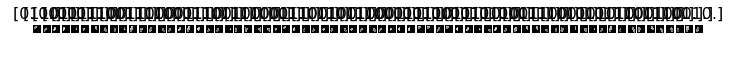

In [33]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [34]:
test_labels = test_labels[:,0]
test_labels

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1.], dtype=float32)

In [35]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [36]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [37]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='confusion matrix',
                         cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    else:
        print('confusion matrix, without matrix')
    
    print(cm)
    
    thresh=cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

confusion matrix, without matrix
[[ 9 26]
 [ 3 32]]


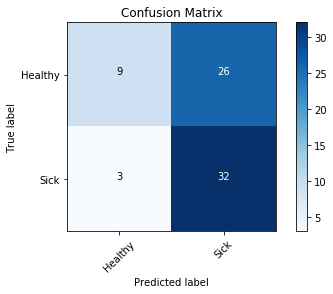

In [38]:
cm_plot_labels = ['Healthy', 'Sick']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

Saving model to deploy later

In [39]:
model.save('C:/Users/tahad/Desktop/Flask_App/breast_cancer_classifier.h5')